In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_WD_csv(filename):
    with open(filename, 'r') as f:  #Open safely using with statement
        lines = f.readlines()[1:]   #Read all lines except first into array
    data = []
    for line in lines:              #Iterate
        _splitted = line.strip().split(',') #Split lines from delimiter ,
        data.append([_splitted[0],_splitted[1],_splitted[2]])   #Append name of the white dwarf, logg and M to list
    data = np.array(data)           #Convert list of lists to nparray
    return data[:,0], data[:,1].astype(np.float64), data[:,2].astype(np.float64) #First column is name, second is logg, and third is M.

def convert_to_radii(M, logg):
    G = 6.6743e-11   #N*m^2*kg^-2
    Ms = 1.988416e30 #Mass of Sun kg
    RE = 6371000     #m, mean radius of earth
    M = Ms * M       #Convert from solar mass to CGS
    # g = G*M/R^2 -> R = (G*M/g)^(1/2)
    R = np.sqrt(G*M/(10**logg))
    return R/RE      #return R in terms of Earth radius

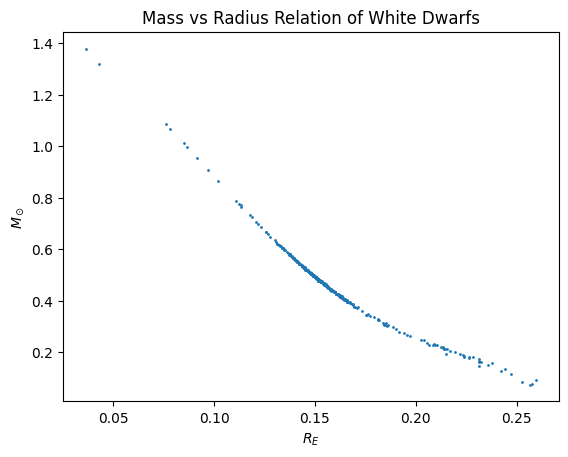

In [4]:
_, logg, M = read_WD_csv('white_dwarf_data.csv') #Read logg and M from csv
R = convert_to_radii(M,logg) #Calculate R from logg and M
plt.plot(R,M,'.',markersize=2) #Plot
plt.xlabel(r'$R_E$')
plt.ylabel(r'$M_\odot$')
plt.title('Mass vs Radius Relation of White Dwarfs')
plt.show()